In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# load the dataset
df = pd.read_csv("Iris.csv")

In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width',]]
y = df['species']

In [5]:
# train/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
svm_model = SVC()

In [7]:
# fitting the model
svm_model.fit(X_train, y_train)

SVC()

In [8]:
# predict
y_pred = svm_model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
for i in range(1, 101):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= i)
  svm_model = SVC()
  svm_model.fit(X_train, y_train)
  y_pred = svm_model.predict(X_test)
  print(f'For random state {i} Accuracy score is {accuracy_score(y_test, y_pred)}')


For random state 1 Accuracy score is 0.9666666666666667
For random state 2 Accuracy score is 0.9666666666666667
For random state 3 Accuracy score is 0.9666666666666667
For random state 4 Accuracy score is 0.9666666666666667
For random state 5 Accuracy score is 0.9666666666666667
For random state 6 Accuracy score is 1.0
For random state 7 Accuracy score is 0.8666666666666667
For random state 8 Accuracy score is 0.9333333333333333
For random state 9 Accuracy score is 1.0
For random state 10 Accuracy score is 0.9666666666666667
For random state 11 Accuracy score is 0.9333333333333333
For random state 12 Accuracy score is 0.9666666666666667
For random state 13 Accuracy score is 1.0
For random state 14 Accuracy score is 0.9666666666666667
For random state 15 Accuracy score is 1.0
For random state 16 Accuracy score is 0.9333333333333333
For random state 17 Accuracy score is 0.9666666666666667
For random state 18 Accuracy score is 1.0
For random state 19 Accuracy score is 1.0
For random state

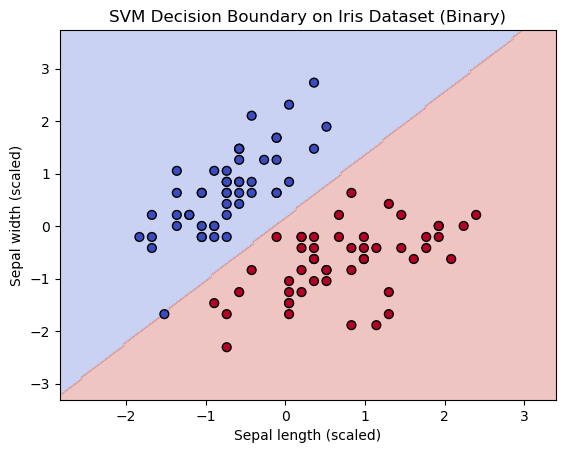

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features for 2D visualization
y = iris.target

# For simplicity, let's only use two classes (binary classification)
X = X[y != 2]
y = y[y != 2]

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Sepal length (scaled)')
    plt.ylabel('Sepal width (scaled)')
    plt.title('SVM Decision Boundary on Iris Dataset (Binary)')
    plt.show()

plot_decision_boundary(X, y, model)


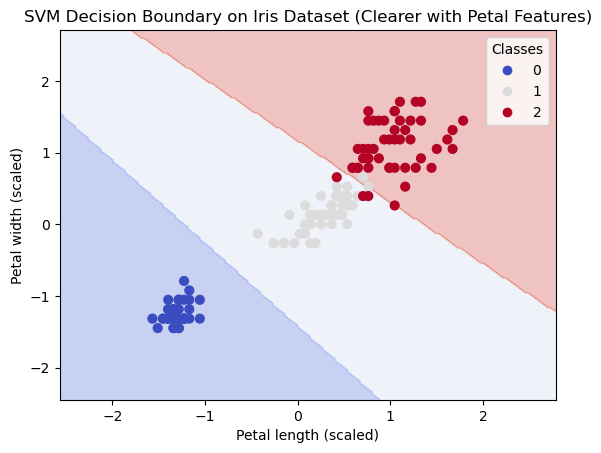

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Petal length & petal width
y = iris.target

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM with all three classes using 'ovr' strategy
model = SVC(kernel='linear', decision_function_shape='ovr')
model.fit(X, y)

# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length (scaled)')
    plt.ylabel('Petal width (scaled)')
    plt.title('SVM Decision Boundary on Iris Dataset (Clearer with Petal Features)')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(X, y, model)


In [15]:
x,y = 0.5,0.5
z= x**2+y**2
z

0.5